In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, model_selection 
%matplotlib inline

In [6]:
## Wildfire Prediction Using Machine Learning

In [7]:
# A Python project created by Tyler Astle

In [8]:
df = pd.read_csv("data//wf_datatrimmed_8col.csv", 
                 encoding="utf-8", 
                 index_col=0, 
                 names=["YEAR", "CAUSE", "AREA", "LATITUDE", "LONGITUDE", "OWNER", "COUNTY"],
                 low_memory=False)

In [9]:
df['COUNTY'] = df['COUNTY'].str.upper()

In [10]:
df.sample(500)

,YEAR,CAUSE,AREA,LATITUDE,LONGITUDE,OWNER,COUNTY
163097,2003,1.0,0.10,33.641389,-109.486667,5.0,11
35978,2009,9.0,0.10,41.054444,-121.971667,5.0,89
1114033,2001,9.0,0.20,30.283900,-82.920800,14.0,SUWANNEE
843974,1992,13.0,0.30,34.641667,-79.587500,14.0,35
782466,1995,7.0,3.00,34.342601,-88.866377,14.0,PONTOTOC
...,...,...,...,...,...,...,...
575936,2009,9.0,1.00,34.496670,-77.895000,14.0,PENDER
201863296,2013,9.0,0.01,29.071175,-96.467586,8.0,JACKSON
1606275,2008,13.0,1.00,32.100062,-89.769738,14.0,RANKIN
833893,1994,13.0,0.20,33.870833,-79.279167,14.0,34


In [18]:
# Take user input, then clean data and display yearly burn area by county
def plotCountyBurnAreaPerYear():
    countystr = str.upper(input("County name: "))
    county_df = df[df['COUNTY'] == countystr]
    county_df.sort_values('YEAR')
    county_df = county_df.groupby('YEAR').AREA.sum()
    county_df.plot(x="YEAR", y="AREA", title=countystr + " COUNTY BURN AREA (ACRES)")

County name: Santa Cruz


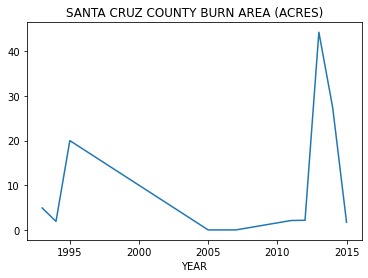

In [23]:
plotCountyBurnAreaPerYear()

In [240]:
# Spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['COUNTY','AREA','CAUSE','OWNER']), df[['AREA']], test_size= 0.2, random_state=4)

In [241]:
x_test

,YEAR,LATITUDE,LONGITUDE
323554,2007,33.698031,-117.217047
854414,2001,40.602940,-111.366860
1406394,2006,34.396570,-86.171817
201159555,2011,33.316007,-84.547618
501974,2007,48.592810,-116.464400
...,...,...,...
201812946,2013,37.221500,-119.515267
300115672,2014,40.751100,-73.502700
300111447,2014,34.625330,-95.217670
201405739,2011,32.635183,-100.752203


In [254]:
regressor = skl.ensemble.RandomForestRegressor(n_estimators=200)

In [255]:
regressor.fit(x_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=200)

In [256]:
regressor.score(x_train, y_train)

0.8358282378056403

In [257]:
predict = regressor.predict(x_test)

In [258]:
regressor.score(x_test, y_test)

-0.038317246457210574

In [24]:
skl.metrics.mean_squared_error(y_test, predict)

NameError: name 'skl' is not defined